In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.svm import LinearSVC, SVC
from sklearn.feature_selection import RFECV

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [2]:
# Using seaborn's style
nice_fonts = {
        # Use LaTeX to write all text
        "text.usetex": False,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 10,
        "font.size": 10,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 8,
        "xtick.labelsize": 8,
        "ytick.labelsize": 8,
}

plt.rcParams.update(nice_fonts)

def set_size(width, fraction=1):
    """ Set aesthetic figure dimensions to avoid scaling in latex.

    Parameters
    ----------
    width: float
            Width in pts
    fraction: float
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

width = 418.25368

## Load data

In [3]:
def get_data():
    
    try:
        columns = np.load("data_columns.npy")
        X = np.load("data_valence_physio_for_svm.npy")
        Y = np.load("data_valence_label_for_svm.npy")
        return pd.DataFrame(X, columns=columns), pd.DataFrame(Y)
    except:
        print "No stored files found.. load from files first"

In [4]:
X, Y = get_data()
print X.shape
print Y.shape

(321600, 24)
(321600, 1)


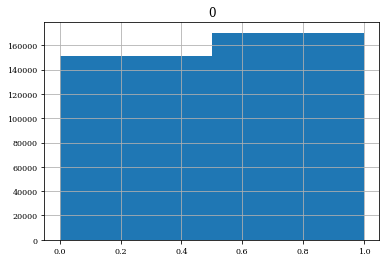

In [5]:
# binarize the problem
Y[Y<=4] = 0
Y[Y>=5] = 1
Y.hist(bins=2)
Y = Y.values.ravel()

## LinearSVC

### Search for optimal C parameter

In [6]:
result = []

for i in range(0,10):
    c = 1*10**-i
    # reshape data for estimator
    lsvc = LinearSVC(C=c, tol=1e-4, dual=False, fit_intercept=False, class_weight='balanced', verbose=True)

    # evaluate using 5-fold cross validation
    stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
    results = cross_val_score(lsvc, X, Y, cv=stratified_cv, verbose=0)

    result.append({ "c": c, "score" : results.mean()*100, "std" : results.std()*100})

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

In [7]:
max_score = max(result, key=lambda x: x["score"])

print "optimal value: {}".format(max_score["c"])
print("Accuracy: %.2f%% (%.2f%%)" % (max_score["score"], max_score["std"]))

optimal value: 0.1
Accuracy: 55.33% (0.19%)


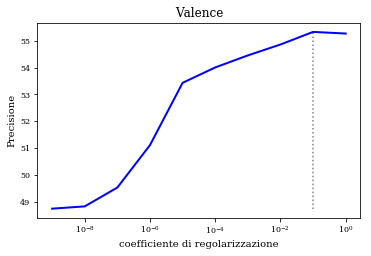

In [9]:
results = { r["c"] : r for r in result }
c_values = list(sorted(results.keys()))
scores = [ results[c]["score"] for c in c_values ]
fig = plt.figure(figsize=set_size(width=width))
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(c_values, scores, color='blue', lw=2)
ax.vlines([1e-1], min(scores), max(scores), colors='gray', linestyles="dotted")
ax.set_xscale('log')
ax.set_title("Valence")
ax.set_ylabel("Precisione")
ax.set_xlabel("coefficiente di regolarizzazione")
plt.show()
fig.savefig("reg_coef_val.pdf", format="pdf", bbox_inches='tight')

Create classifier with optimal parameter

In [9]:
lsvc = LinearSVC(C=1e-1, tol=1e-4, dual=False, fit_intercept=False, class_weight='balanced', verbose=True)
# evaluate using 5-fold cross validation
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

## KBest Feature selection + SVC

In [10]:
# Such a large set of features can cause overfitting and also slow computing
# Use feature selection to select the most important features
import sklearn.feature_selection

In [11]:
scores_by_kbest = []

for k in range(1,24):

    kbest_selector = sklearn.feature_selection.SelectKBest(k=k)
    kbest_selector.fit(X, Y)
    
    results = cross_val_score(lsvc, kbest_selector.transform(X), Y, cv=stratified_cv, verbose=0)

    ks = {
        "feature" : X.columns[kbest_selector.get_support()],
        "score" : results.mean(),
        "std"   : results.std()
    }
    
    scores_by_kbest.append(ks)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear

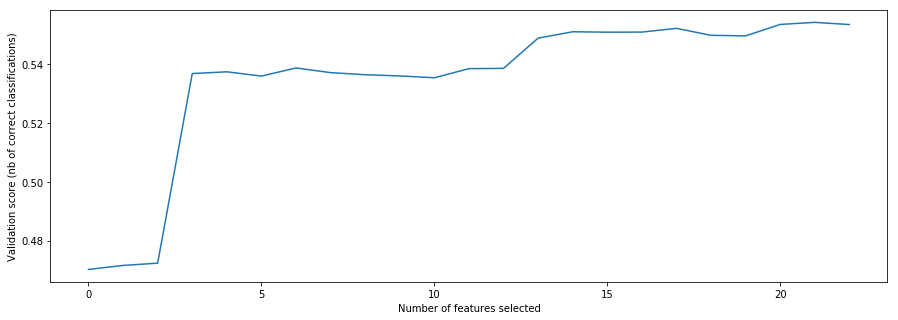

In [12]:
scores = [ s["score"] for s in scores_by_kbest ]
plt.figure(figsize=(15,5))
plt.xlabel("Number of features selected")
plt.ylabel("Validation score (nb of correct classifications)")
plt.plot(np.arange(len(scores)), scores)
plt.show()

In [13]:
max_score = max(scores_by_kbest, key=lambda x: x["score"])

print("Optimal number of features : %d" % len(max_score["feature"]))
print max_score["feature"]

print
print("Accuracy: %.2f%% (%.2f%%)" % (max_score["score"]*100, max_score["std"]*100))

Optimal number of features : 22
Index([u'ECG_mean', u'ECG_std', u'ECG_min', u'ECG_max', u'ECG_mean_diff',
       u'EDA_mean', u'EDA_std', u'EDA_min', u'EDA_max', u'EDA_mean_diff',
       u'EDA_mean_abs_diff', u'Resp_mean', u'Resp_std', u'Resp_min',
       u'Resp_max', u'Resp_mean_abs_diff', u'SKT_mean', u'SKT_std', u'SKT_min',
       u'SKT_max', u'SKT_mean_diff', u'SKT_mean_abs_diff'],
      dtype='object')

Accuracy: 55.44% (0.21%)


## Univariate Feature Selection + SVC

In [14]:
from sklearn.feature_selection import SelectPercentile, f_classif

In [15]:
percentile_selector = SelectPercentile(f_classif, percentile=10)
percentile_selector.fit(X, Y)

SelectPercentile(percentile=10,
         score_func=<function f_classif at 0x7f7669a247d0>)

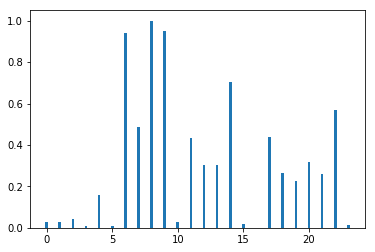

Index([u'EDA_mean', u'EDA_min', u'EDA_max'], dtype='object')

In [16]:
scores = -np.log10(percentile_selector.pvalues_)
scores[np.isinf(scores)] = scores[np.isfinite(scores)].max()
scores /= scores.max()
plt.bar(np.arange(X.shape[1]), scores, width=.2)
plt.show()

X.columns[percentile_selector.get_support()]

In [17]:
results = cross_val_score(lsvc, percentile_selector.transform(X), Y, cv=stratified_cv, verbose=0)

print
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]
Accuracy: 47.23% (0.05%)


## Recursive feature selection

In [18]:
rfecv = RFECV(estimator=lsvc, step=1, cv=stratified_cv, scoring='accuracy', n_jobs=-1)

In [19]:
rfecv.fit(X, Y)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

RFECV(cv=StratifiedKFold(n_splits=5, random_state=7, shuffle=True),
   estimator=LinearSVC(C=0.1, class_weight='balanced', dual=False, fit_intercept=False,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=True),
   min_features_to_select=1, n_jobs=-1, scoring='accuracy', step=1,
   verbose=0)

In [20]:
rfecv.estimator_.coef_

array([[ 0.03891687, -0.21042122, -0.11575018,  0.23493505,  2.31627671,
        -0.66629742, -2.2236111 , -0.29049569,  0.44984057, -1.14568781,
         0.40416551,  1.48156046,  3.30168195, -0.78197115, -3.13555588,
        -0.25378734,  0.14082437,  0.73581526]])

In [21]:
print("Optimal number of features : %d" % rfecv.n_features_)
print X.columns[rfecv.get_support()]

print
print("Accuracy: %.2f%% (%.2f%%)" % (rfecv.grid_scores_[rfecv.n_features_ - 1]*100, 0))

Optimal number of features : 18
Index([u'ECG_mean', u'ECG_std', u'ECG_mean_diff', u'ECG_mean_abs_diff',
       u'EDA_mean', u'EDA_std', u'EDA_min', u'EDA_max', u'EDA_mean_abs_diff',
       u'Resp_mean', u'Resp_std', u'Resp_min', u'SKT_mean', u'SKT_std',
       u'SKT_min', u'SKT_max', u'SKT_mean_diff', u'SKT_mean_abs_diff'],
      dtype='object')

Accuracy: 55.37% (0.00%)


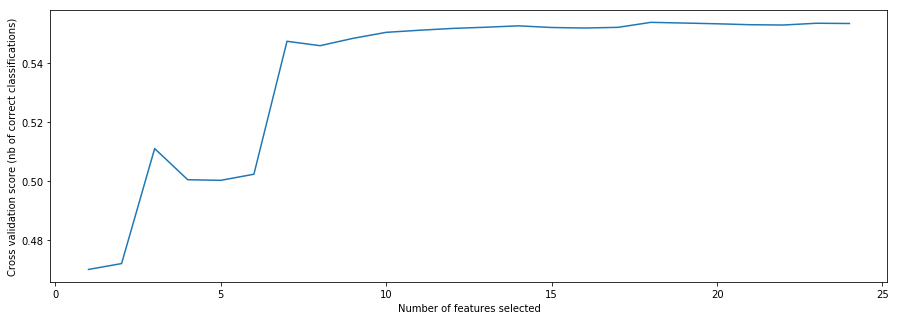

In [22]:
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(15,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()